In [2]:
import pandas as pd
df_og = pd.read_csv("/home/aweiland/comparing_theories/5k_mol_stats.csv")

df = df_og.dropna()
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1.1.1,mol_id,atom_index,Shift,atom_type,num_atoms,xtb_rmsd,aimnet_rmsd,...,egret_rmsd,egret_time,uma_time,uma_rmsd,r2scan_time,r2scan-3c_rmsd,B3LYP_time,B3LYP_rmsd,wb97_time,wb97_rmsd
0,0,0,0,2192,0,108.4,6,57,0.567481,0.476640,...,0.003635,464.0,6.0,0.001347,6251.17,0.331355,6453.67,0.112193,11351.99,0.724349
1,1,1,1,2194,0,12.9,6,27,0.145308,0.075593,...,0.002764,373.0,2.0,0.001143,812.51,0.033727,595.59,0.039446,872.74,0.023271
2,2,2,2,2198,0,144.8,6,48,0.121894,0.174574,...,0.001712,278.0,3.0,0.001064,4109.44,0.106159,3562.29,0.060537,5670.82,0.059299
3,3,3,3,2202,1,69.4,6,40,0.200460,0.129943,...,0.002875,315.0,4.0,0.001282,2879.94,0.044456,2479.13,0.125377,4281.15,0.083523
4,4,4,4,2203,1,69.0,6,29,0.197792,0.104656,...,0.005081,461.0,3.0,0.001593,1322.37,0.084289,1239.67,0.073515,1418.14,0.034307


In [3]:
df["xtb_coretime"] = df["xtb_runtime"] * 16 / 60
df["egret_coretime"] = df["egret_runtime"] / 60
df["r2scan_coretime"] = df["r2scan_time"] * 16 / 60
df["B3LYP_coretime"] = df["B3LYP_time"] * 16 / 60
df["uma_coretime"] = df["uma_time"] / 60
df["wb97_coretime"] = df["wb97_time"] * 16 / 60

<ipython-input-3-ff37d91f20c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["xtb_coretime"] = df["xtb_runtime"] * 16 / 60
<ipython-input-3-ff37d91f20c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["egret_coretime"] = df["egret_runtime"] / 60
<ipython-input-3-ff37d91f20c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [4]:
mean = df[["xtb_coretime", "egret_coretime", "uma_coretime", "r2scan_coretime", "B3LYP_coretime", "wb97_coretime"]].mean()

mean_df = mean.reset_index()
mean_df.columns = ["theory", "mean_value"]
aimnet_row = pd.DataFrame([{
    "theory": "AIMNET",
    "mean_value": 0.0546
}])

mean_df = pd.concat([mean_df, aimnet_row], ignore_index=True)



label_map = {
    'xtb_coretime': 'xTB',
    "egret_coretime": "Egret-1",
    "uma_coretime": "UMA",
    "r2scan_coretime": "r2scan-3c",
    "B3LYP_coretime": "B3LYP/def2-TZVP",
    "AIMNET": "AIMNET-2 (GPU)",
    "wb97_coretime": "wB97MV/def2-TZVP"
    
}
mean_df['theory'] = mean_df['theory'].map(label_map)



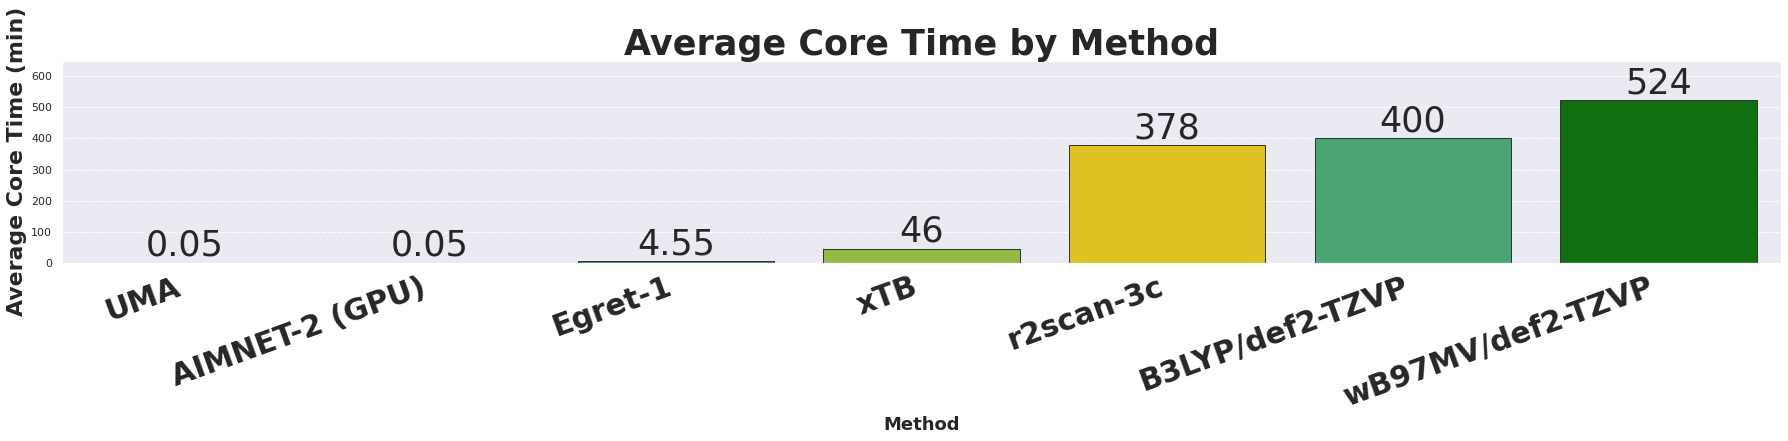

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the mean_df by mean_value
mean_df_sorted = mean_df.sort_values("mean_value", ascending=True)

# Define custom color list
colors = ["pink", "orange", "seagreen", "yellowgreen", "gold", "mediumseagreen", "green"]

plt.figure(figsize=(25, 6))
sns.set(style="darkgrid")

# Create barplot with custom colors
ax = sns.barplot(
    data=mean_df_sorted, 
    x="theory", 
    y="mean_value", 
    palette=colors[:len(mean_df_sorted)],  # Ensure palette matches number of bars
    edgecolor=".2"
)
ax.yaxis.grid(True, linestyle='--', alpha=1)


# Add labels above bars
methods_with_3dp = ["UMA", "Egret-1", "AIMNET-2 (GPU)"]

for i, (bar, method) in enumerate(zip(ax.patches, mean_df_sorted["theory"])):
    height = bar.get_height()
    label = f"{height:.2f}" if method in methods_with_3dp else f"{height:.0f}"
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # x position
        height + 0.002,                      # y position (slightly above bar)
        label,                     # label text, 3 decimal places
        ha='center', va='bottom', fontsize=35
    )

# Labels and formatting
plt.xlabel("Method", fontsize=18, weight='bold')
plt.ylabel("Average Core Time (min)", fontsize=22, weight='bold')
plt.title("Average Core Time by Method", fontsize=35, weight='bold')

plt.xticks(rotation=20, ha='right', fontsize=30, weight='bold')
#ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.set_ylim(0, 650)
plt.tight_layout()
plt.show()


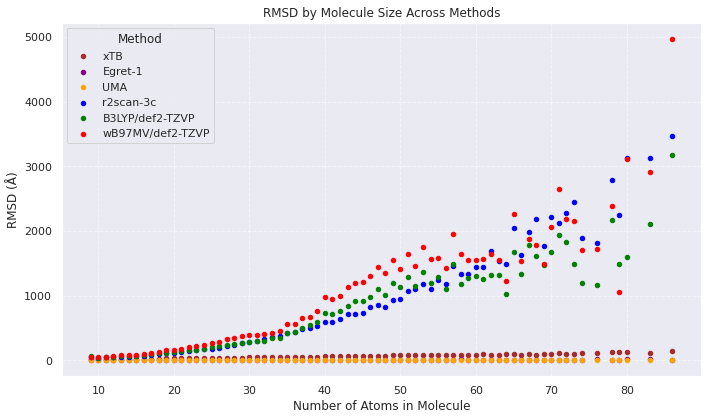

In [17]:
run_time = ["xtb_coretime", "egret_coretime", "uma_coretime", "r2scan_coretime", "B3LYP_coretime", "wb97_coretime"]

colors = ["brown", "purple", "orange", "blue", "green", "red"]

label_map = {
    'xtb_coretime': 'xTB',
    'aimnet_coretime': 'AIMNET',
    "egret_coretime": "Egret-1",
    "uma_coretime": "UMA",
    "r2scan_coretime": "r2scan-3c",
    "B3LYP_coretime": "B3LYP/def2-TZVP",
    "wb97_coretime": "wB97MV/def2-TZVP"
}

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each method
for method, color in zip(run_time, colors):
    avg_by_size = df.groupby("num_atoms")[method].mean()
    ax.scatter(avg_by_size.index, avg_by_size.values, label=label_map[method], color=color, s=20)

# Customize plot
ax.legend(title="Method")
plt.xlabel("Number of Atoms in Molecule")
plt.ylabel("RMSD (Å)")
plt.title("RMSD by Molecule Size Across Methods")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [7]:
wb97 = df.loc[df["num_atoms"] > 60, ["mol_id", "num_atoms", "wb97_time"]]
wb97.head()

,mol_id,num_atoms,wb97_time
27,2440,80,882.95
29,2452,73,774.40
30,2453,63,1927.20
37,2553,62,943.44
40,2568,66,565.27
